<a href="https://colab.research.google.com/github/gonzaloelejalde/piii-2025/blob/main/clase05/clase05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejericico 10 (archivo wav y mp4)



Subo el audio


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Netflix.wav to Netflix (1).wav


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NetflixM.mp3 to NetflixM (1).mp3


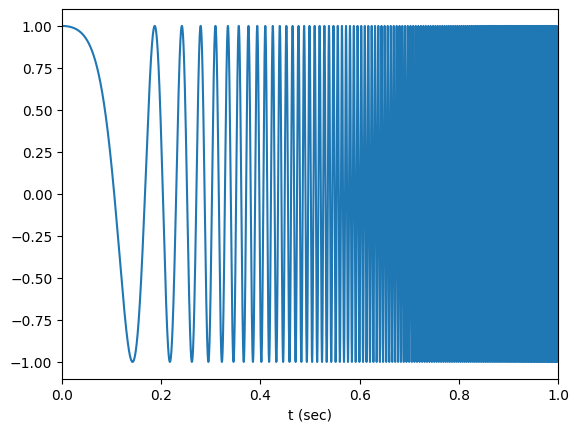

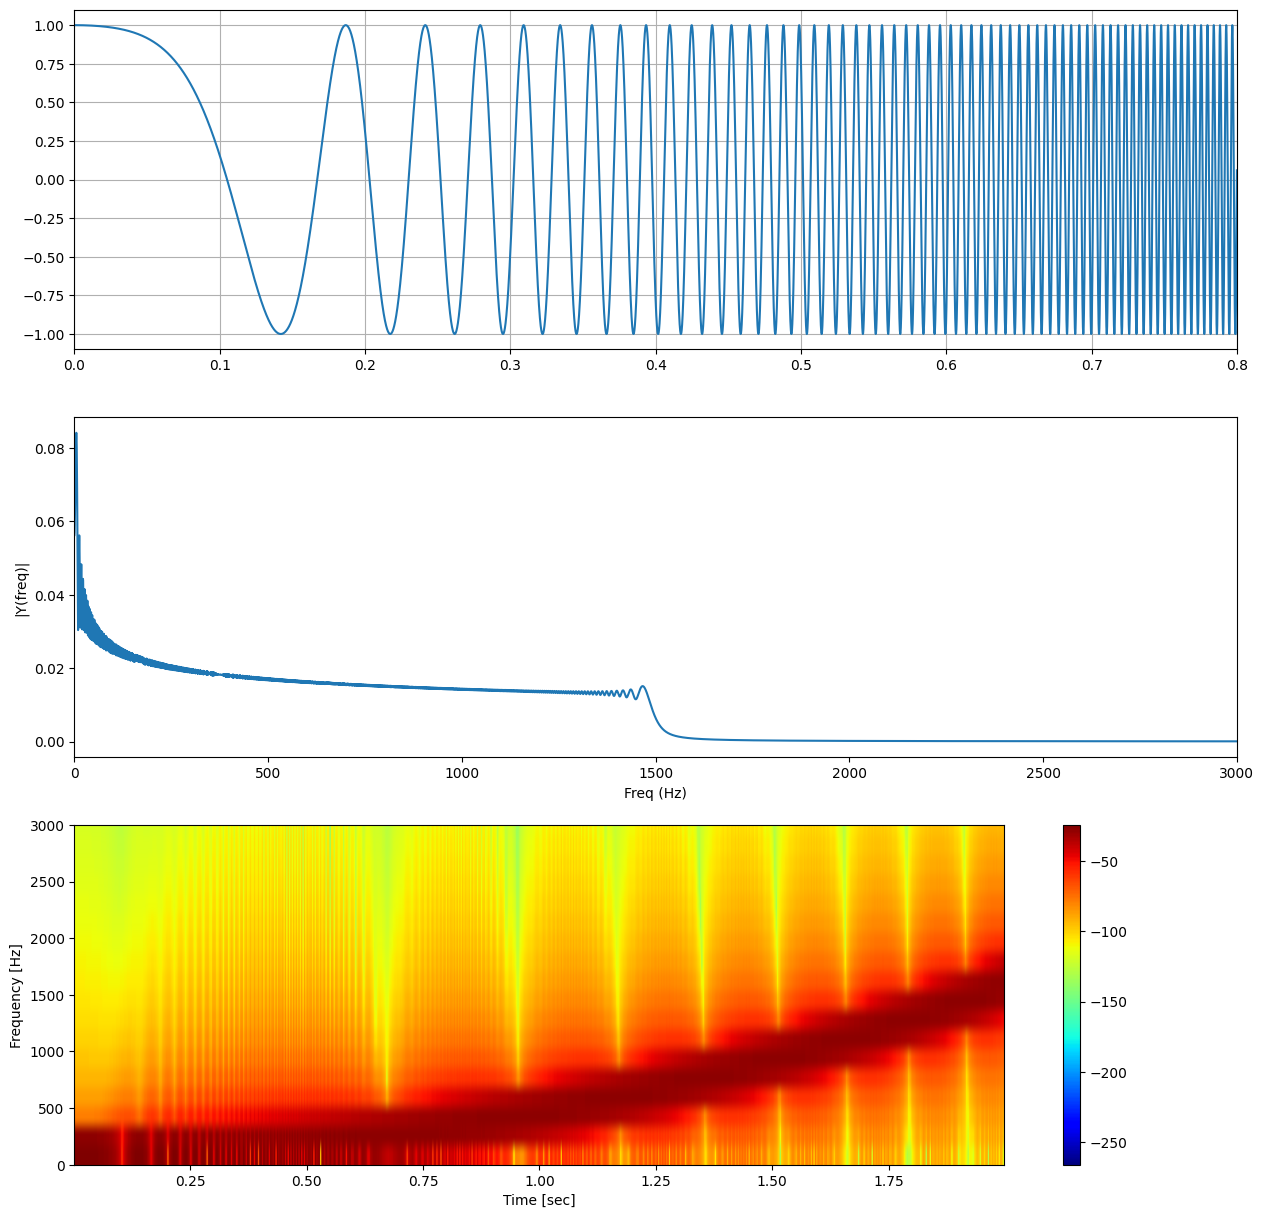

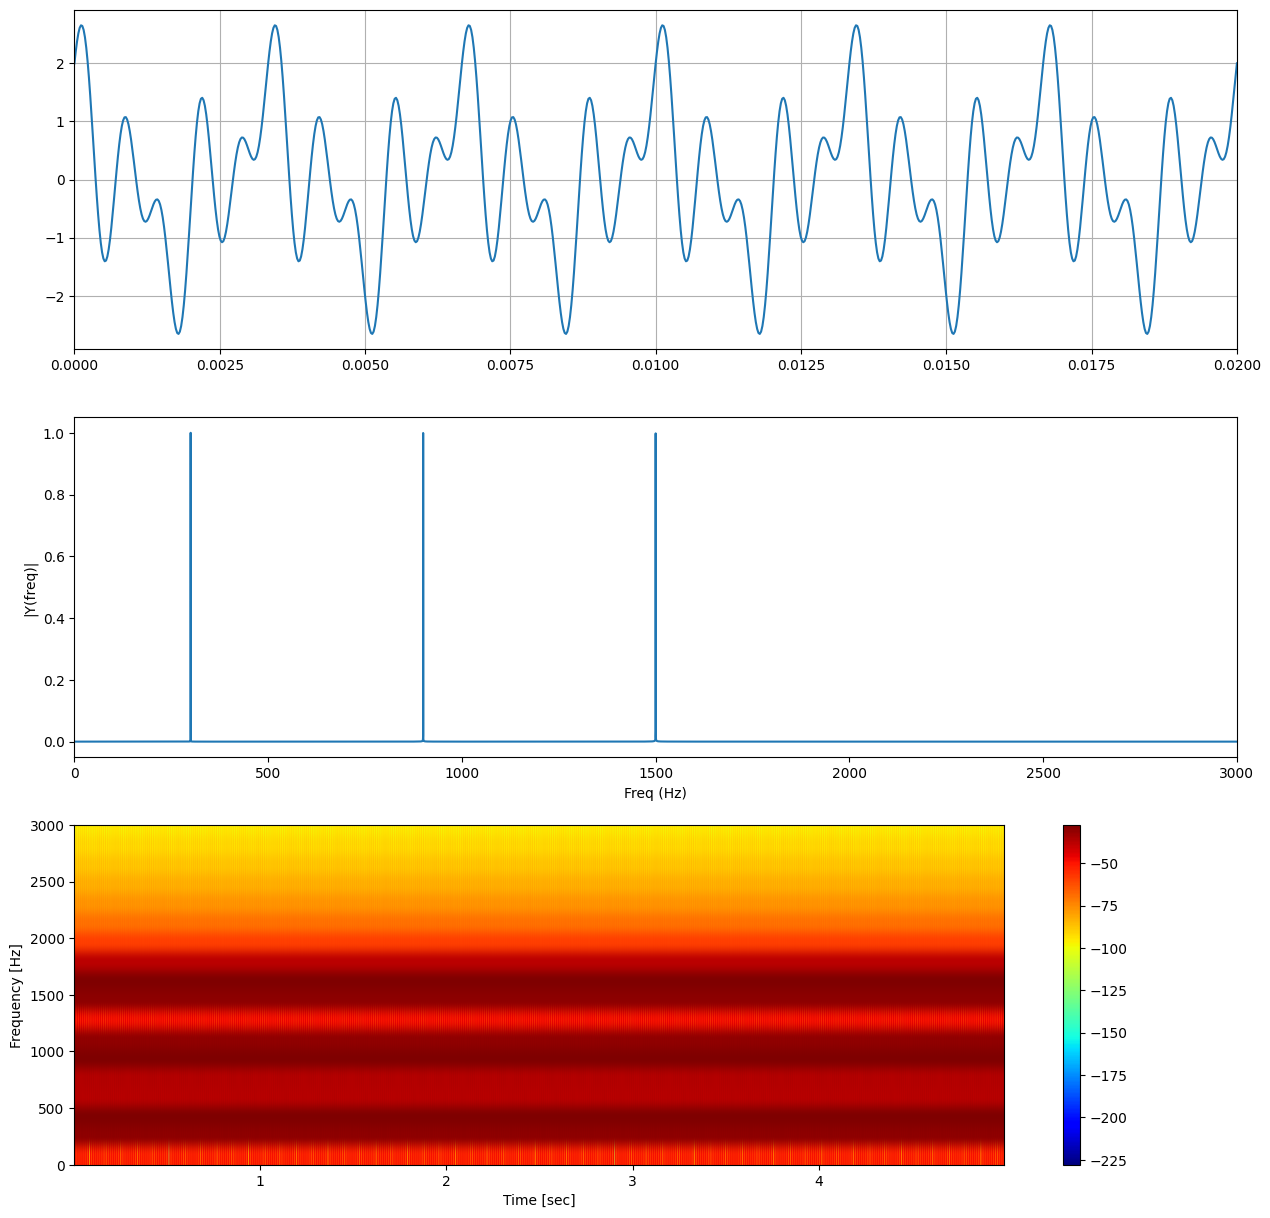

In [ ]:
# **Espectrograma**
# Representación en tres dimensiones: tiempo, frecuencia y amplitud.

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftshift
from scipy.io import wavfile

# Commented out IPython magic to ensure Python compatibility.
# %%capture
# !pip install ffmpeg-python==0.2.0
#

segundos = 2
t = np.linspace( 0, segundos, 44100 * segundos )
w = signal.chirp( t, f0 = 1, f1 = 1500, t1 = segundos, method = 'quadratic' )
plt.plot( t, w )
plt.xlim( [ 0, 1 ] )
plt.xlabel( 't (sec)' )
plt.show()

def cosenoidal( frecuencia, duracion = 1, sample_rate = 44100, A = 1 ) :
    n = np.linspace( 0, duracion, sample_rate * duracion )
    return A * np.cos( 2 * np.pi * frecuencia * n )

def generador_de_tono( frecuencia, duracion = 1, sample_rate = 44100, A = 1 ) :
    n = np.linspace( 0, duracion, sample_rate * duracion )
    return A * np.sin( 2 * np.pi * frecuencia * n )

def fourier_calculation( y, sample_rate = 44100 ) :
    '''Aplicando fast fourier transform'''
    yf = fft( y )
    N = len( y )
    yf = 2.0 / N * np.abs( yf[ 0 : N // 2 ] )  # // es la división entera (https://www.youtube.com/watch?v=NRX6KvEP-u8)
    xf = np.linspace ( 0.0, 1 / 2 * sample_rate, N // 2 )
    return yf, xf

def plot_tiempo_frecuencia_espectrograma( y,
                                          sample_rate = 44100,
                                          tiempo_max = -1,
                                          f_max_fft = 3000,
                                          f_max_espectrograma = 3000 ) :
    '''Plotea la señal en dominio del tiempo, en dominio de la frecuencia y espectrograma'''

    # Creo el espacio para plotear, una figura vacía
    plt.figure( figsize = ( 15, 15 ) )
    x = np.linspace( 0, len( y ) / sample_rate, len( y ) )

    plt.subplot( 3, 1, 1 )  # Dividido en 2 filas y 1 columna, ploteo la onda en la primer fila
    if tiempo_max != -1 :
        plt.xlim( [ 0, tiempo_max ] )
    plt.plot( x, y )
    plt.grid()  # Grilla de fondo

    # FFT
    yf, xf = fourier_calculation( y, sample_rate )
    plt.subplot( 3, 1, 2 )
    plt.xlabel( 'Freq (Hz)' )
    plt.ylabel( '|Y(freq)|' )
    plt.xlim( [ 0, f_max_fft ] )
    plt.plot( xf, yf )

    # Espectrograma
    plt.subplot( 3, 1, 3 )
    a = plt.specgram( y, Fs = sample_rate, cmap = 'jet' )
    plt.ylim( [ 0, f_max_espectrograma ] )
    plt.ylabel( 'Frequency [Hz]' )
    plt.xlabel( 'Time [sec]' )
    plt.colorbar()
    plt.show()

plot_tiempo_frecuencia_espectrograma( w, sample_rate = 44100, tiempo_max = 0.8 )

cos_1 = cosenoidal( 300, 5, 44100 )
cos_2 = cosenoidal( 900, 5 )
sin_1 = generador_de_tono( 1500, 5, 44100 )
suma_de_senales = cos_1 + cos_2 + sin_1

plot_tiempo_frecuencia_espectrograma( suma_de_senales, sample_rate = 44100, tiempo_max = 0.02 )

"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Grabando con el micrófono... pulsar para finalizar";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Guardando la grabación... ¡espere!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())
  recordButton.innerText = "Listo"

});

}
});

</script>
"""

# Esta función devuelve dos variables
# audio = son las muestras del audio capturado por el microfóno que identifica nuestro navegador
# sr = frecuencia de muestro en la que fue capturado el audio
def get_audio() :
  display( HTML( AUDIO_HTML ) )
  data = eval_js( "data" )
  binary = b64decode( data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read( io.BytesIO( riff ) )

  return audio, sr

grabacion, sample_rate = get_audio()

print( f"Cantidad de canales = { len( grabacion.shape ) }")
print( f"Cantidad de muestras = { grabacion.shape[ 0 ] }")

length = grabacion.shape[ 0 ] / sample_rate
print( f"Duración = { length } segundos" )

plot_tiempo_frecuencia_espectrograma( grabacion, sample_rate )

Analizo

Frecuencia de muestreo = 48000 Hz
Cantidad de muestras = 192262
Cantidad de canales = 1
Duración = 4.01 segundos


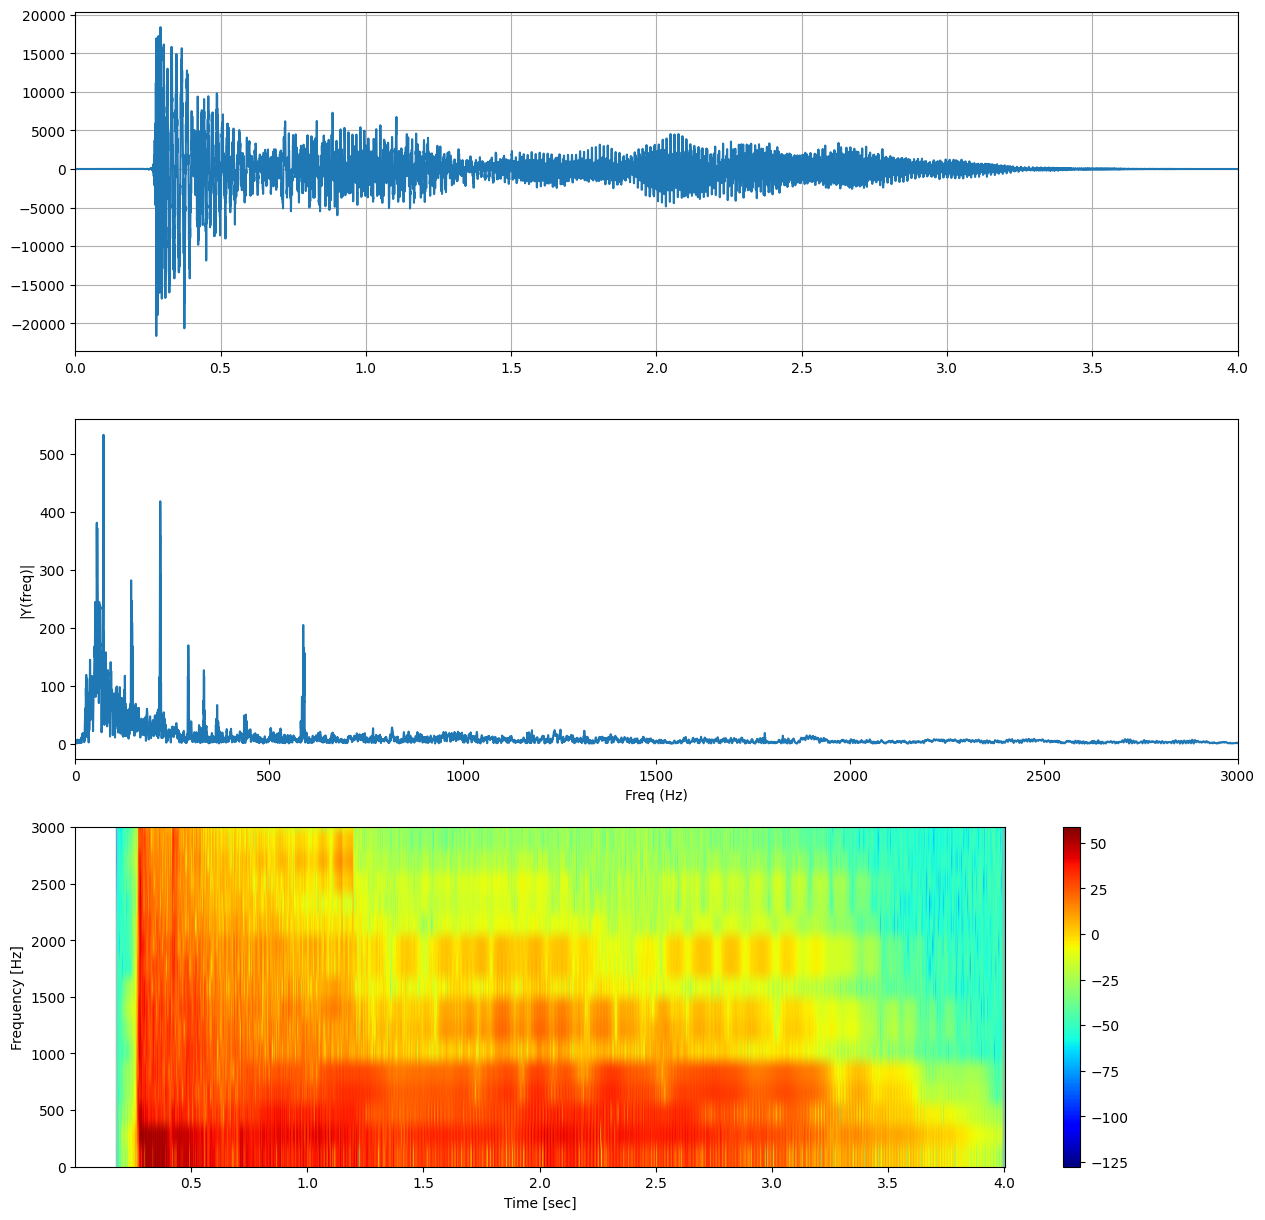

In [ ]:
from scipy.io import wavfile

# Leer archivo WAV
sample_rate, grabacion = wavfile.read("Netflix.wav")

# Si tiene varios canales (estéreo), usar uno solo
if grabacion.ndim > 1:
    grabacion = grabacion[:, 0]

# Datos del archivo
print(f"Frecuencia de muestreo = {sample_rate} Hz")
print(f"Cantidad de muestras = {grabacion.shape[0]}")
print(f"Cantidad de canales = {1 if grabacion.ndim == 1 else grabacion.shape[1]}")
print(f"Duración = {grabacion.shape[0] / sample_rate:.2f} segundos")

# Graficar
plot_tiempo_frecuencia_espectrograma(grabacion, sample_rate, tiempo_max=4)


MP3


Frecuencia de muestreo = 44100 Hz
Cantidad de muestras = 179200
Cantidad de canales = 1 (librosa convierte a mono por defecto)
Duración = 4.06 segundos


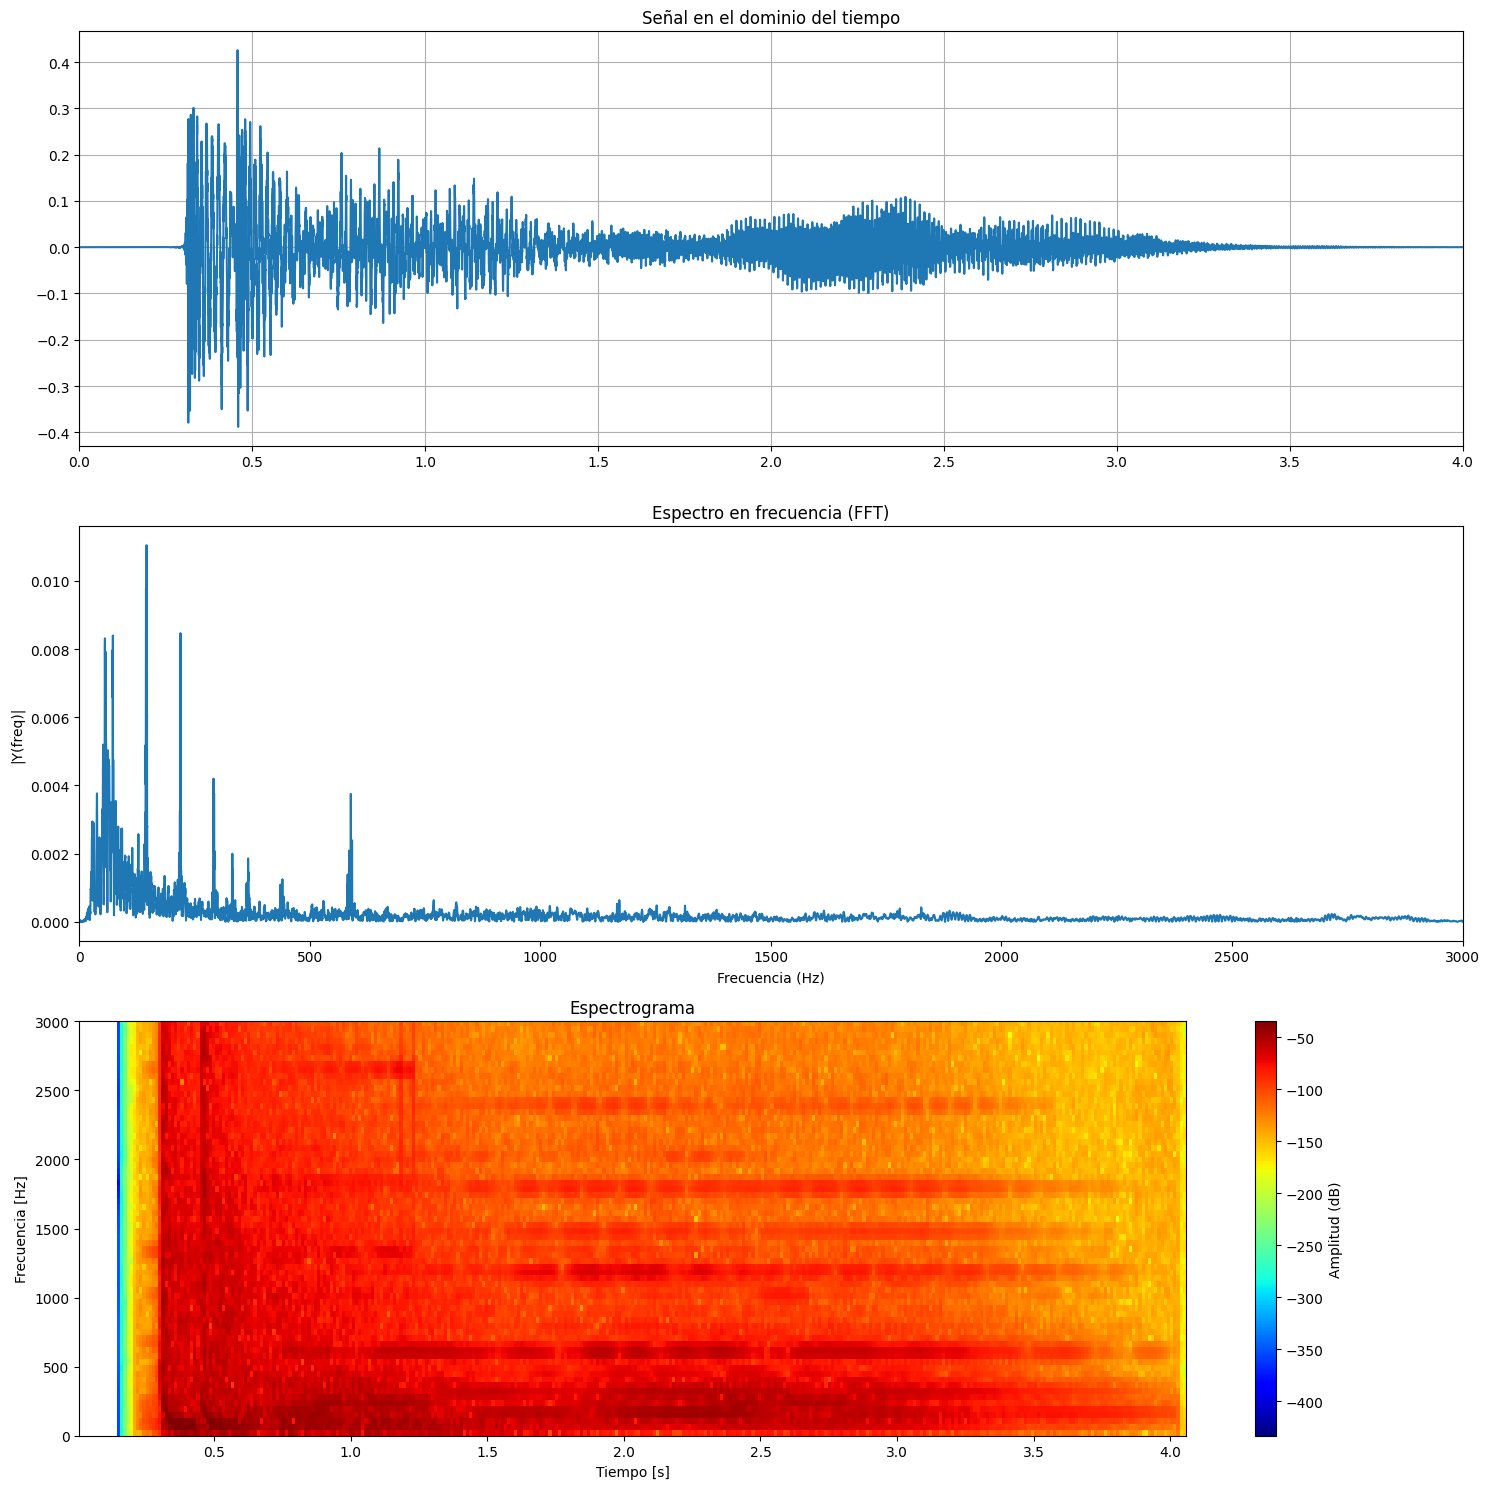

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# -------------------------------
# Función FFT
# -------------------------------
from scipy.fft import fft

def fourier_calculation(y, sample_rate=44100):
    N = len(y)
    yf = fft(y)
    yf = 2.0 / N * np.abs(yf[0:N // 2])
    xf = np.linspace(0.0, 1 / 2 * sample_rate, N // 2)
    return yf, xf

# -------------------------------
# Función de ploteo
# -------------------------------
def plot_tiempo_frecuencia_espectrograma(y,
                                          sample_rate=44100,
                                          tiempo_max=-1,
                                          f_max_fft=3000,
                                          f_max_espectrograma=3000):
    plt.figure(figsize=(15, 15))
    x = np.linspace(0, len(y) / sample_rate, len(y))

    # Señal en el tiempo
    plt.subplot(3, 1, 1)
    if tiempo_max != -1:
        plt.xlim([0, tiempo_max])
    plt.plot(x, y)
    plt.title("Señal en el dominio del tiempo")
    plt.grid()

    # FFT
    yf, xf = fourier_calculation(y, sample_rate)
    plt.subplot(3, 1, 2)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.xlim([0, f_max_fft])
    plt.plot(xf, yf)
    plt.title("Espectro en frecuencia (FFT)")

    # Espectrograma
    plt.subplot(3, 1, 3)
    plt.specgram(y, Fs=sample_rate, NFFT=1024, noverlap=512, cmap='jet')
    plt.ylim([0, f_max_espectrograma])
    plt.ylabel('Frecuencia [Hz]')
    plt.xlabel('Tiempo [s]')
    plt.title("Espectrograma")
    plt.colorbar(label="Amplitud (dB)")
    plt.tight_layout()
    plt.show()

# -------------------------------
# Cargar tu archivo MP3 (ya subido al entorno de Colab)
# -------------------------------
ruta = "NetflixM.mp3"   # asegúrate que el archivo esté en /content/

y, sample_rate = librosa.load(ruta, sr=None, mono=True)  # sr=None mantiene el original

# -------------------------------
# Info del audio
# -------------------------------
print(f"Frecuencia de muestreo = {sample_rate} Hz")
print(f"Cantidad de muestras = {y.shape[0]}")
print(f"Cantidad de canales = 1 (librosa convierte a mono por defecto)")
print(f"Duración = {y.shape[0] / sample_rate:.2f} segundos")

# -------------------------------
# Graficar
# -------------------------------
plot_tiempo_frecuencia_espectrograma(y, sample_rate, tiempo_max=4)



Ejercicio 11

In [34]:
from IPython.display import display, Javascript
from google.colab import output
import base64

# Código JavaScript para grabar en WebM (formato por defecto del navegador)
RECORD = """
async function recordAudio() {
  const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
  const mediaRecorder = new MediaRecorder(stream);
  let audioChunks = [];

  mediaRecorder.ondataavailable = event => {
    audioChunks.push(event.data);
  };

  mediaRecorder.start();

  // Tiempo de grabación (en ms) → 5000 = 5 segundos
  await new Promise(resolve => setTimeout(resolve, 5000));

  mediaRecorder.stop();

  await new Promise(resolve => {
    mediaRecorder.onstop = () => {
      const blob = new Blob(audioChunks, { type: 'audio/webm' });
      const reader = new FileReader();
      reader.readAsDataURL(blob);
      reader.onloadend = () => {
        const base64data = reader.result.split(',')[1];
        google.colab.kernel.invokeFunction('notebook.saveAudio', [base64data], {});
        resolve();
      };
    };
  });
}
recordAudio();
"""

# Función para guardar el audio como WebM
def save_audio(b64_audio):
    audio_bytes = base64.b64decode(b64_audio)
    with open("grabacion_440Hz.webm", "wb") as f:
        f.write(audio_bytes)
    print("🎤 Audio guardado como grabacion_440Hz.webm")

output.register_callback('notebook.saveAudio', save_audio)

display(Javascript(RECORD))

<IPython.core.display.Javascript object>

🎤 Audio guardado como grabacion_440Hz.webm


In [35]:
from pydub import AudioSegment

# Convertir WebM a WAV
sound = AudioSegment.from_file("grabacion_440Hz.webm", format="webm")
sound.export("grabacion_440Hz.wav", format="wav")

print("✅ Conversión lista: grabacion_440Hz.wav")


✅ Conversión lista: grabacion_440Hz.wav


In [36]:
import IPython.display as ipd
ipd.Audio("grabacion_440Hz.wav")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav

fs, data = wav.read("grabacion_440Hz.wav")

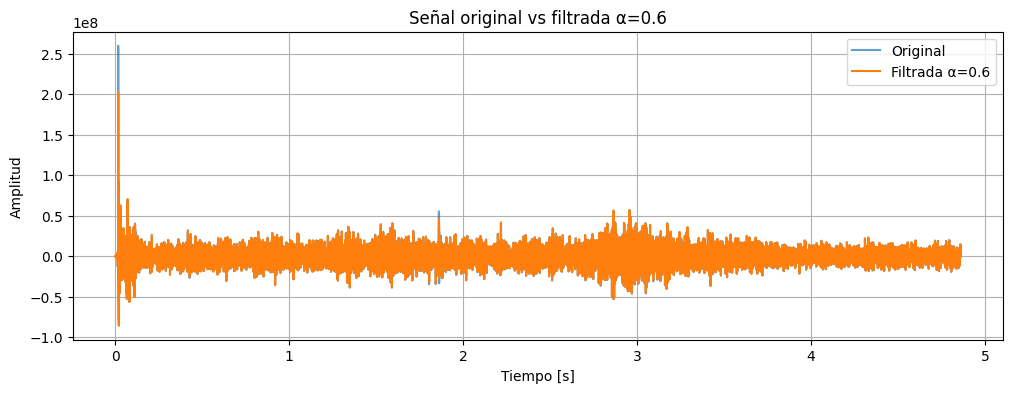

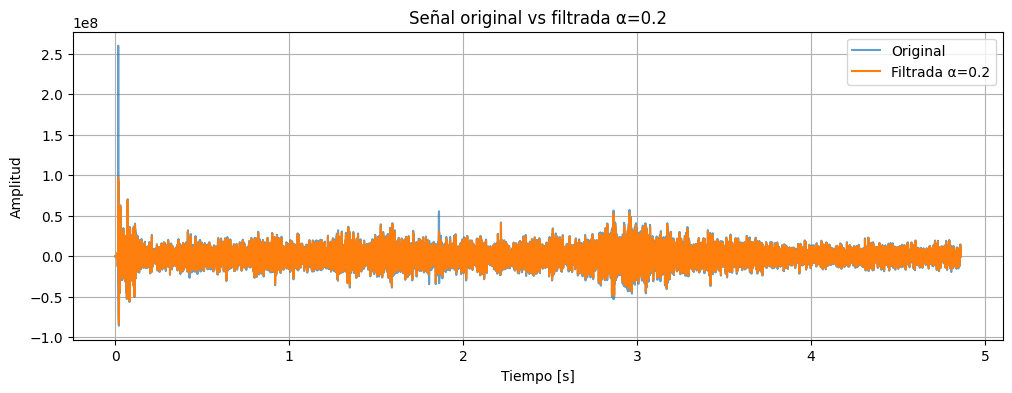

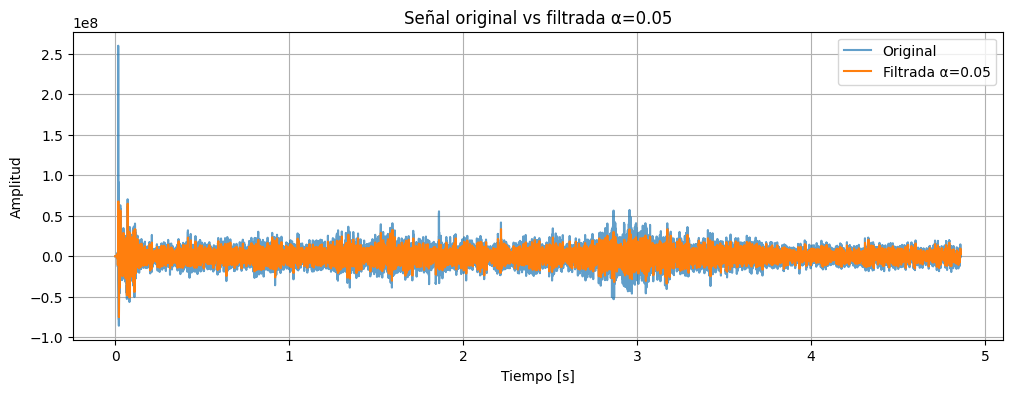

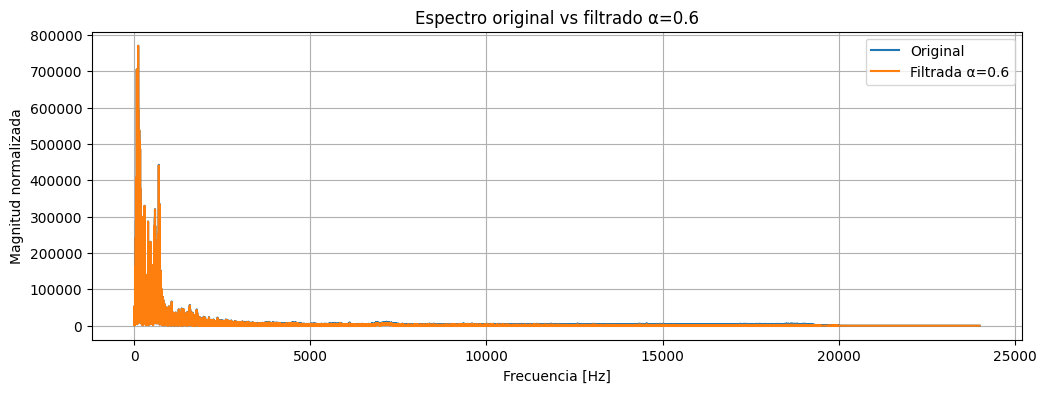

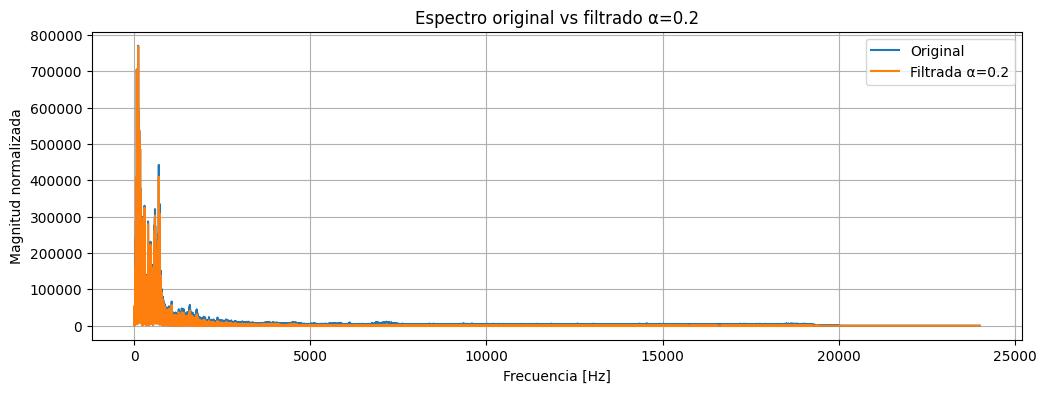

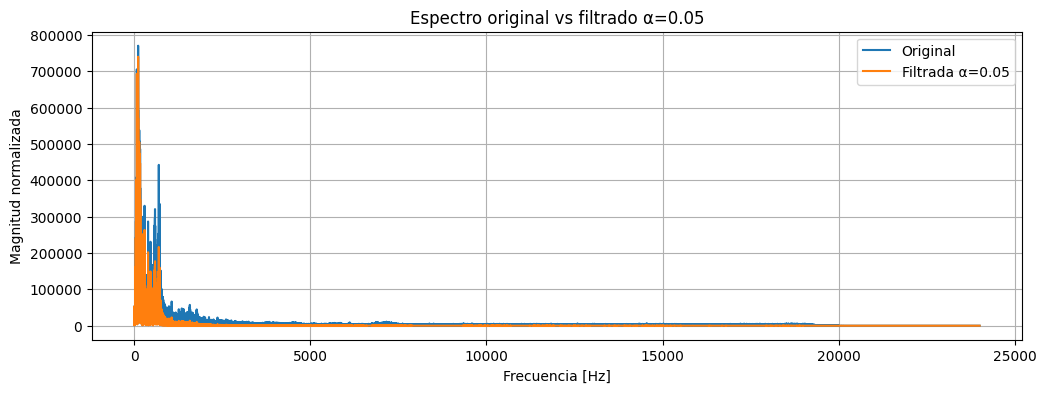

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav
from scipy.fftpack import fft, fftfreq

# -------------------------------
# 1. Leer audio WAV
# -------------------------------
fs, data = wav.read("grabacion_440Hz.wav")

# Si es estéreo, usamos solo un canal
if data.ndim > 1:
    data = data[:,0]

x = data.astype(float)  # Convertir a float para cálculos
t = np.arange(len(x))/fs

# -------------------------------
# 2. Definir filtro EMA
# -------------------------------
def ema_filter(x, alpha):
    y = np.zeros_like(x)
    y[0] = x[0]
    for n in range(1, len(x)):
        y[n] = alpha*x[n] + (1-alpha)*y[n-1]
    return y

alphas = [0.6, 0.2, 0.05]
filtradas = [ema_filter(x, a) for a in alphas]

# -------------------------------
# 3. Graficar señales en tiempo
# -------------------------------
for y, a in zip(filtradas, alphas):
    plt.figure(figsize=(12,4))
    plt.plot(t, x, label="Original", alpha=0.7)
    plt.plot(t, y, label=f"Filtrada α={a}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.title(f"Señal original vs filtrada α={a}")
    plt.legend()
    plt.grid()
    plt.show()

# -------------------------------
# 4. Graficar espectro de frecuencias
# -------------------------------
def plot_spectrum(signal, fs, label):
    N = len(signal)
    X = fft(signal)
    freqs = fftfreq(N, 1/fs)
    plt.plot(freqs[:N//2], np.abs(X[:N//2])/N, label=label)

for y, a in zip(filtradas, alphas):
    plt.figure(figsize=(12,4))
    plot_spectrum(x, fs, "Original")
    plot_spectrum(y, fs, f"Filtrada α={a}")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Magnitud normalizada")
    plt.title(f"Espectro original vs filtrado α={a}")
    plt.legend()
    plt.grid()
    plt.show()
